In [1]:
import pyaudio
from modules import recordingDeviceSelection
from modules import convertFramesToWAW
import sys
import numpy as np
import utility
import pickle

In [2]:
# Initialize port audio library
p = pyaudio.PyAudio()

# Get device
device = recordingDeviceSelection.get_recording_device(p)

Input Device id 0 - Built-in Microphone, Channels count: 2, Default sample rate: 44100.0
Chose device: 0


In [3]:
# Setting up streap characteristics
options = {
    "chunk": 1024,
    "format": pyaudio.paInt16,
    "channels": int(device.get('maxInputChannels')),
    "rate": int(device.get('defaultSampleRate')),
    "sample_width": p.get_sample_size(pyaudio.paInt16),
    "input_device_index": int(device.get('index')),
    "record_seconds": 3
}

In [4]:
# Open streaming
stream = p.open(
    format=options.get('format'),
    channels=options.get('channels'),
    rate=options.get('rate'),
    input_device_index = options.get('input_device_index'),
    input=True,
    frames_per_buffer=options.get('chunk')
)

print("Recording started...")

frames = []

# Write data from mic to frame array
steamLength = int(options.get('rate') / options.get('chunk') * options.get('record_seconds'))
for i in range(0, steamLength):
    data = stream.read(options.get('chunk'))
    frames.append(data)

print("Frame length:", len(frames[0]))
print("Recording stoped.")

# Stop streaming
stream.stop_stream()
stream.close()
p.terminate()

Recording started...
Frame length: 4096
Recording stoped.


In [5]:
sig = np.frombuffer(data, dtype='<i2').reshape(-1, options.get('channels'))

with open('sig2.pickle', 'wb') as f:
    pickle.dump(sig, f)

normalized = utility.pcm2float(sig, np.float32)

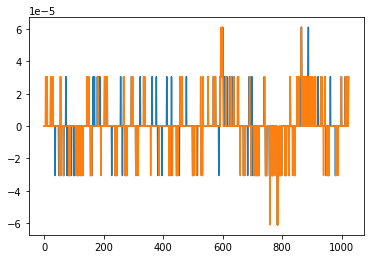

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.plot(normalized)

In [ ]:
normalized.shape

In [8]:
import ipywidgets as widgets
from ipywidgets import interact

slider = widgets.FloatRangeSlider(value=[0,3.0],min=0.01,max=3.0,step=0.001,continuous_update=False)

def calculate_intervals(time):
    x = (1*time/options.get('record_seconds'))
    return int(frames*x)

def plot_graph(time):
    interval1 = calculate_intervals(time[0])
    interval2 = calculate_intervals(time[1])
    res = []
    for i in sig.T:
        res.append(i[interval1:interval2])
    
    plt.plot(np.array(res).T)


interact(plot_graph,time=slider);



interactive(children=(FloatRangeSlider(value=(0.01, 3.0), continuous_update=False, description='time', max=3.0…

In [9]:
from scipy.ndimage.interpolation import shift

angles = np.array([-75, -70, -65, -60, -55, -50, -45, -40, -35, -30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75])
offsets = np.array([
    [-164, -82, 82, 164],
    [-160, -80, 80, 160],
    [-154, -77, 77, 154],
    [-146, -73, 73, 146],
    [-138, -69, 69, 138],
    [-130, -65, 65, 130],
    [-120, -60, 60, 120],
    [-108, -54, 54, 108],
    [-98, -49, 49, 98],
    [-84, -42, 42, 84],
    [-72, -36, 36, 72],
    [-58, -29, 29, 58],
    [-44, -22, 22, 44],
    [-30, -15, 15, 30],
    [-14, -7, 7, 14],
    [0, 0, 0, 0],
    [14, 7, -7, -14],
    [30, 15, -15, -30],
    [44, 22, -22, -44],
    [58, 29, -29, -58],
    [72, 36, -36, -72],
    [84, 42, -42, -84],
    [98, 49, -49, -98],
    [108, 54, -54, -108],
    [120, 60, -60, -120],
    [130, 65, -65, -130],
    [138, 69, -69, -138],
    [146, 73, -73, -146],
    [154, 77, -77, -154],
    [160, 80, -80, -160],
    [164, 82, -82, -164]
]);

directions = np.array([np.sum(np.array([shift(channel,bias,cval=0) for (channel,bias) in zip(sig.T, offset)]).T, axis=1) for offset in offsets])

rms = np.array([np.sqrt(np.mean(direction**2)) for direction in directions])
plt.plot(angles, rms, marker='o')

ModuleNotFoundError: No module named 'scipy'

In [ ]:
theta = [angle/180.0*np.pi for angle in angles]
ax = plt.subplot(111, projection='polar')
ax.plot(theta, rms, marker='o')

In [ ]:
xmax,ymax = -15,9380

plt.plot(angles, rms, marker='o')
plt.annotate('max',
             xy=(xmax, ymax),
             xytext=(xmax+10, ymax+30), fontsize=16, xycoords='data',
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))



In [ ]:
from scipy import signal
import numpy as np

a = np.array([1,2,5,6]).T
b = np.array([3,2,5,7]).T

c = signal.correlate(a,b,method='direct',mode='full')
print(c)

In [ ]:
rms.argmax()